In [1]:
# Step 1: Load and Inspect the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import os


# **Load and Inspect the Data**

In [2]:
# Adjust the file paths based on the folder name you found
prices = pd.read_csv("data/prices.csv")
securities = pd.read_csv("data/securities.csv")
fundamentals = pd.read_csv("data/fundamentals.csv")
pricesSplitAdjusted = pd.read_csv("data/prices-split-adjusted.csv")
# Check the first few rows to verify data loading
print(prices.head())
print(securities.head())
print(fundamentals.head())
print(pricesSplitAdjusted.head())

                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
  Ticker symbol             Security SEC filings             GICS Sector  \
0           MMM           3M Company     reports             Industrials   
1           ABT  Abbott Laboratories     reports             Health Care   
2          ABBV               AbbVie     reports             Health Care   
3           ACN        Accenture plc     reports  Information Technology   
4          ATVI  Activision Blizzard     re

In [102]:
# Display basic information and first few rows
print("Prices Dataset Info:")
print(prices.info())

Prices Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
None


In [103]:
print("\nSecurities Dataset Info:")
print(securities.info())


Securities Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB
None


In [104]:
print("\nFundamentals Dataset Info:")
print(fundamentals.info())


Fundamentals Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                         

In [105]:
print("\nPrices Split Adjusted Dataset Info:")
print(pricesSplitAdjusted.info())


Prices Split Adjusted Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
None



# **Summary Statistics**

In [106]:
# Display summary statistics for the prices data
print("\nPrices Dataset Summary:")
print(prices.describe())



Prices Dataset Summary:
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


In [107]:
# Display summary statistics for the fundamentals data
print("\nFundamentals Dataset Summary:")
print(fundamentals.describe())


Fundamentals Dataset Summary:
        Unnamed: 0  Accounts Payable  Accounts Receivable  \
count  1781.000000      1.781000e+03         1.781000e+03   
mean    890.000000      4.673418e+09        -6.353484e+07   
std     514.274732      1.406047e+10         7.562794e+08   
min       0.000000      0.000000e+00        -6.452000e+09   
25%     445.000000      5.160000e+08        -1.040000e+08   
50%     890.000000      1.334000e+09        -1.830000e+07   
75%    1335.000000      3.246000e+09         7.816000e+06   
max    1780.000000      2.069390e+11         2.266400e+10   

       Add'l income/expense items  After Tax ROE  Capital Expenditures  \
count                1.781000e+03    1781.000000          1.781000e+03   
mean                 6.908940e+07      43.601348         -1.251925e+09   
std                  6.848143e+08     233.924028          2.979963e+09   
min                 -6.768000e+09       0.000000         -3.798500e+10   
25%                 -2.638000e+06      10.000000 

In [108]:
# Display summary statistics for the prices data
print("\nSecurities Dataset Summary:")
print(securities.describe())


Securities Dataset Summary:
                CIK
count  5.050000e+02
mean   7.074490e+05
std    5.144375e+05
min    1.800000e+03
25%    8.631200e+04
50%    8.310010e+05
75%    1.075531e+06
max    1.659166e+06


In [109]:
# Display summary statistics for the fundamentals data
print("\nPrices Split Adjusted Dataset Summary:")
print(pricesSplitAdjusted.describe())


Prices Split Adjusted Dataset Summary:
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


# **Check for Missing Values**

In [110]:
# Check for missing values in each dataset
print("\nMissing Values in Prices:")
print(prices.isnull().sum())


Missing Values in Prices:
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


In [111]:
print("\nMissing Values in Securities:")
print(securities.isnull().sum())


Missing Values in Securities:
Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64


In [112]:
print("\nMissing Values in Fundamentals:")
print(fundamentals.isnull().sum())


Missing Values in Fundamentals:
Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64


In [113]:

print("\nMissing Values in prices split adjusted:")
print(pricesSplitAdjusted.isnull().sum())


Missing Values in prices split adjusted:
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


# **Data Visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


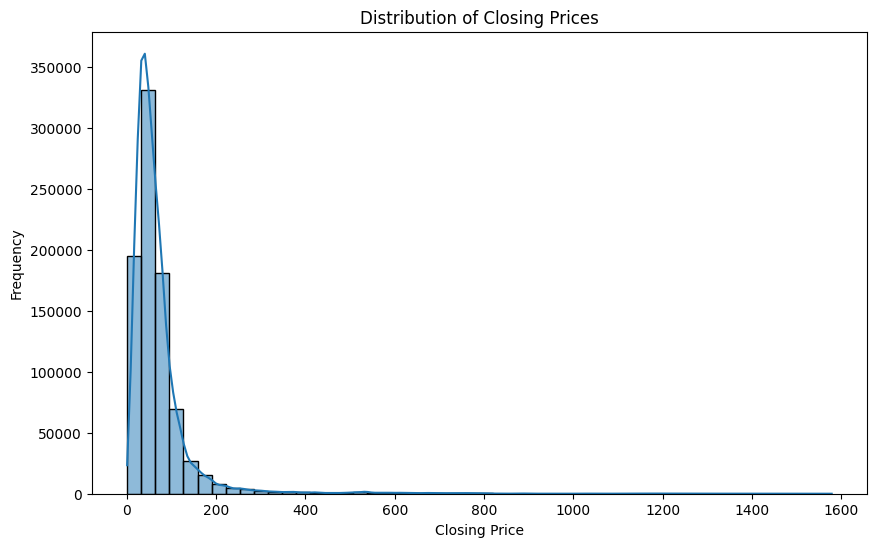

In [114]:
# Plot the distribution of stock prices
plt.figure(figsize=(10, 6))
sns.histplot(prices['close'], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

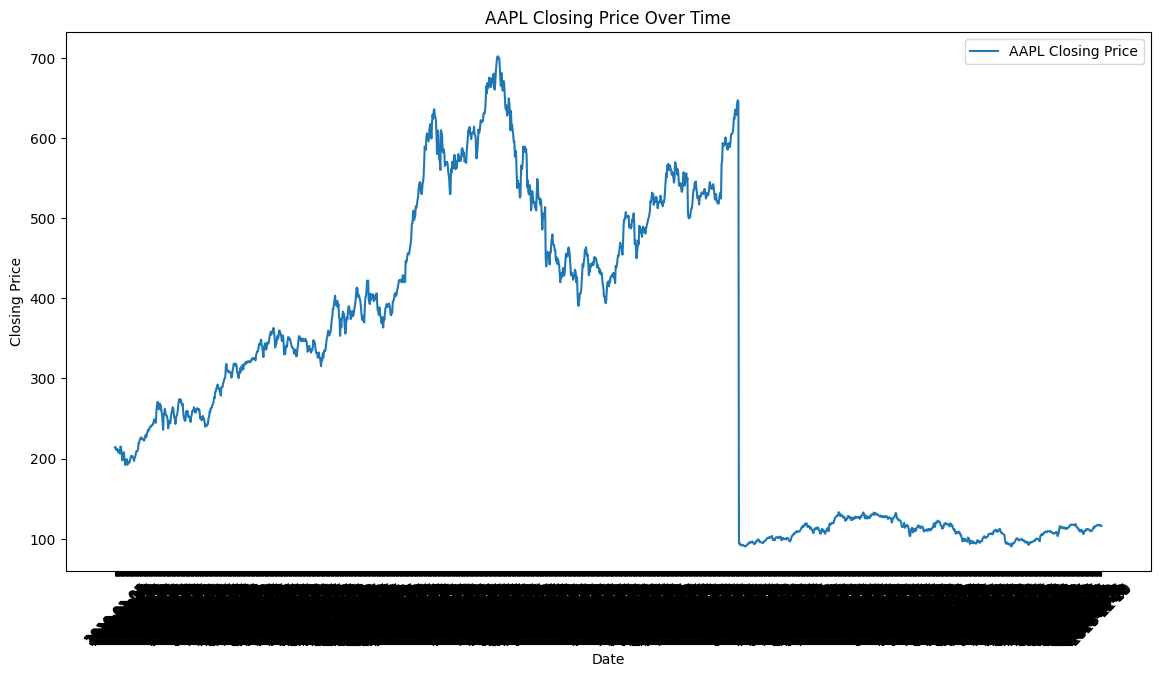

In [115]:
# Sample a single stock to analyze price trends over time
sample_stock = prices[prices['symbol'] == 'AAPL']  # Example with Apple stock

plt.figure(figsize=(14, 7))
plt.plot(sample_stock['date'], sample_stock['close'], label='AAPL Closing Price')
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **Correlation Analysis**

In [116]:
print(prices.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


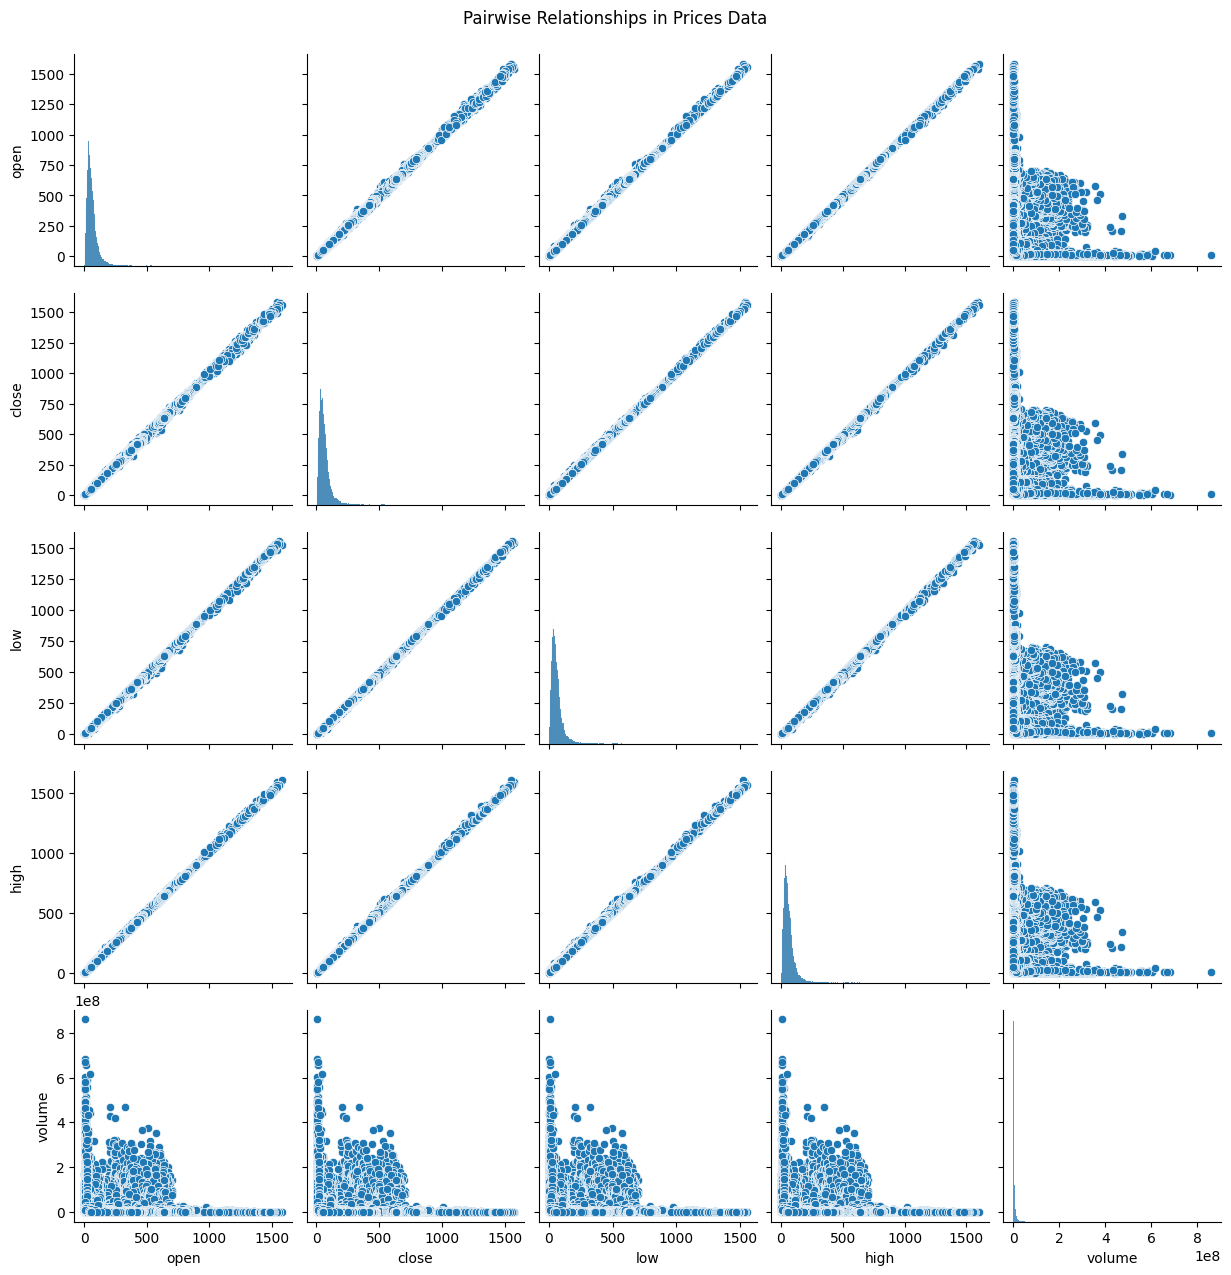

In [118]:
import warnings
import numpy as np

# Select a subset of columns from prices for pair plotting
subset_prices = prices[['open', 'close', 'low', 'high', 'volume']]

# Suppress the specific FutureWarning temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Replace inf and -inf values with NaN and drop rows with NaN values
    subset_prices = subset_prices.replace([np.inf, -np.inf], np.nan)
    subset_prices = subset_prices.dropna()

    # Plot pairwise relationships
    sns.pairplot(subset_prices)
    plt.suptitle("Pairwise Relationships in Prices Data", y=1.02)
    plt.show()


In [120]:
print(securities.columns)

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')


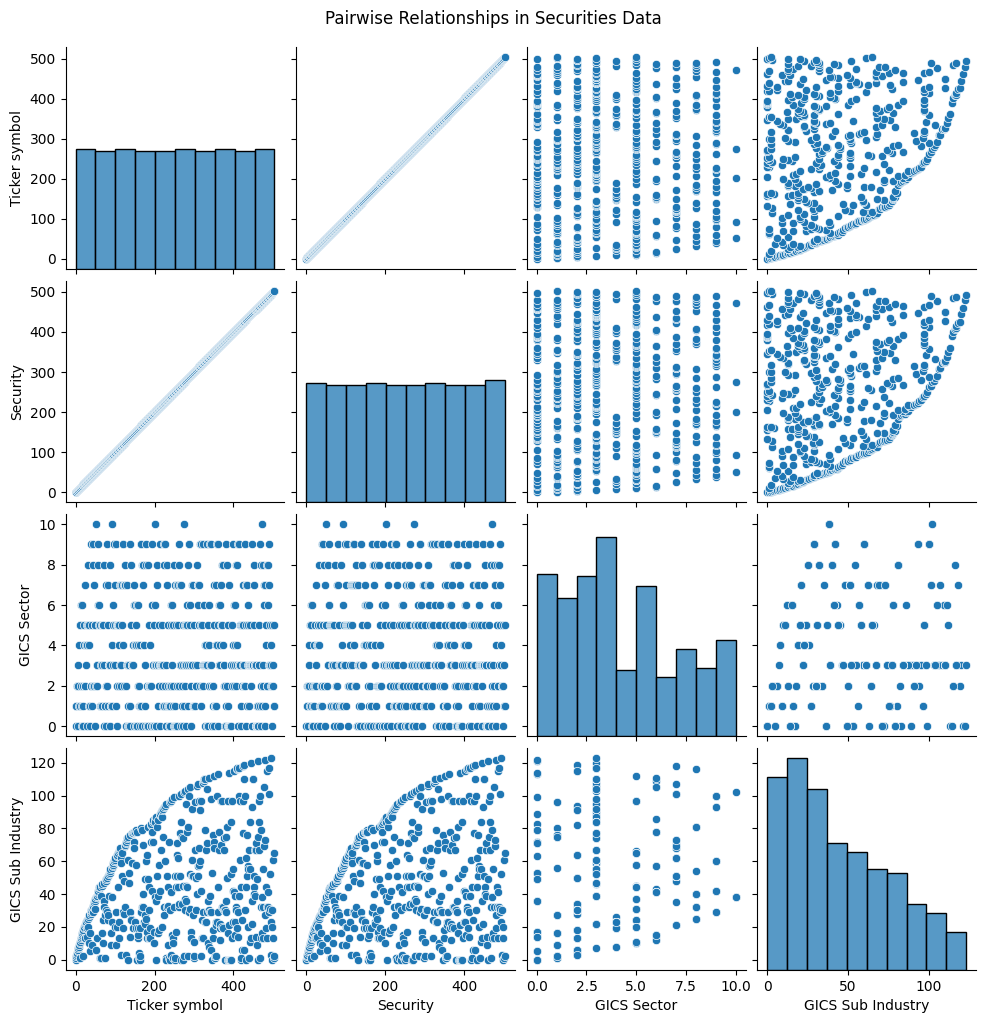

In [121]:
# First, let's select a subset of columns that contain categorical data
subset_securities = securities[['Ticker symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']]

# Suppress the specific FutureWarning temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Encode categorical columns to numerical for plotting
    subset_securities_encoded = subset_securities.apply(lambda col: pd.factorize(col)[0])

    # Plot pairwise relationships
    sns.pairplot(subset_securities_encoded)
    plt.suptitle("Pairwise Relationships in Securities Data", y=1.02)
    plt.show()

In [122]:
print(pricesSplitAdjusted.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


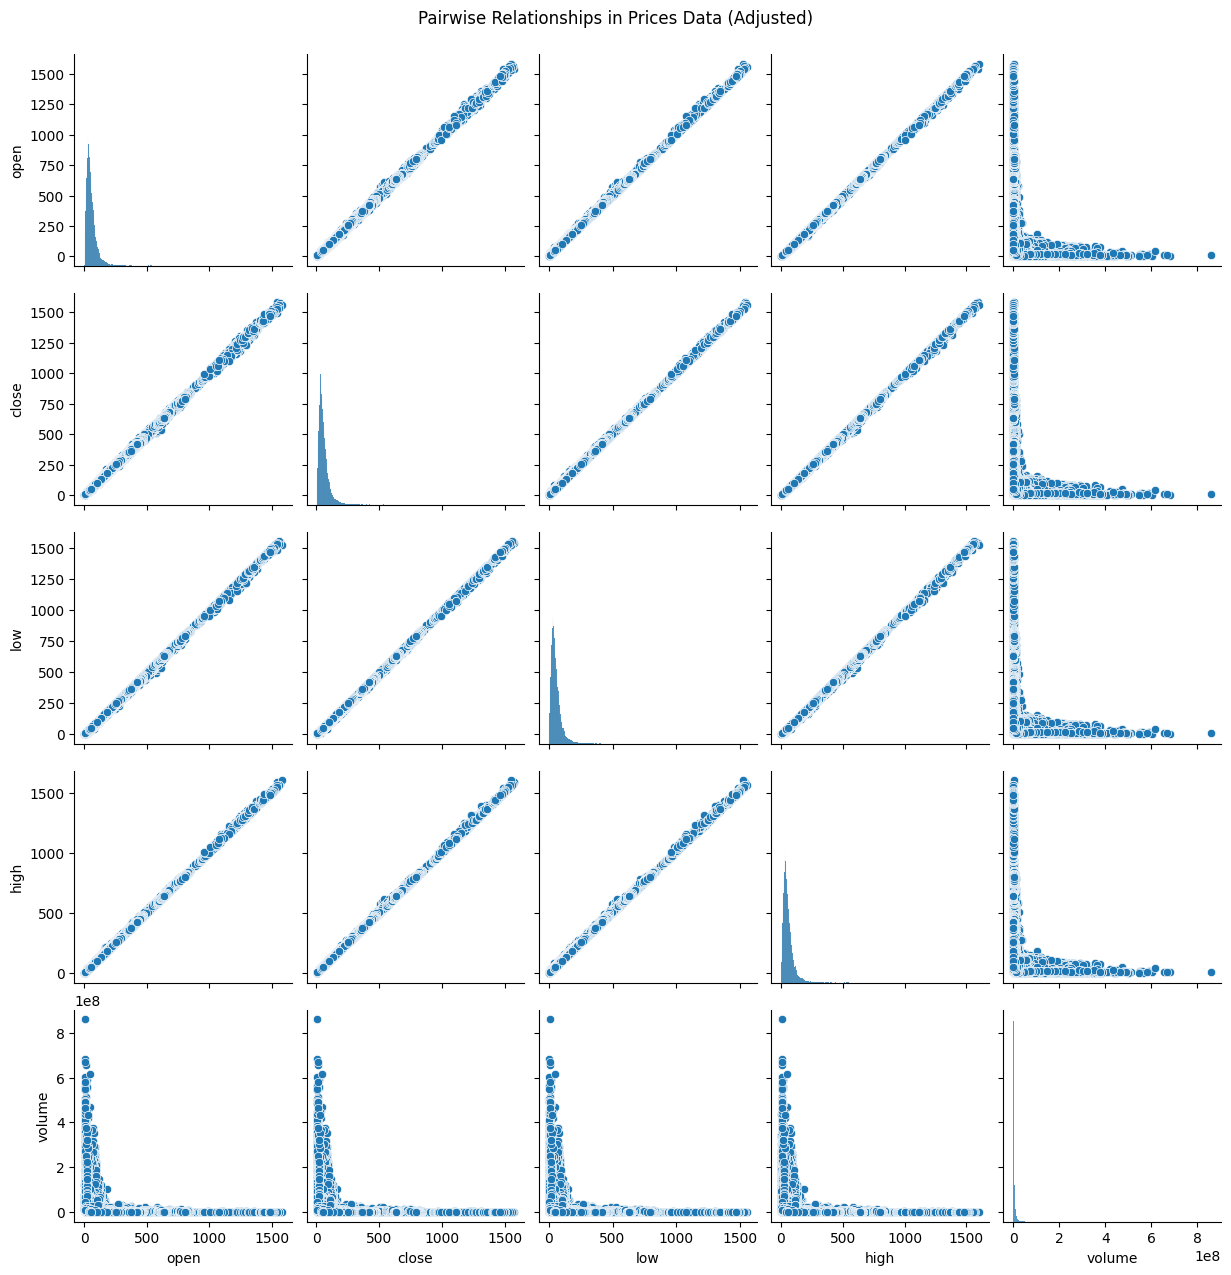

In [123]:
# Example: Assuming 'pricesSplitAdjusted' is your DataFrame
# Select a subset of numerical columns for pair plotting
subset_prices = pricesSplitAdjusted[['open', 'close', 'low', 'high', 'volume']]

# Suppress the specific FutureWarning temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Replace inf and -inf values with NaN and drop rows with NaN values
    subset_prices = subset_prices.replace([np.inf, -np.inf], np.nan)
    subset_prices = subset_prices.dropna()

    # Plot pairwise relationships
    sns.pairplot(subset_prices)
    plt.suptitle("Pairwise Relationships in Prices Data (Adjusted)", y=1.02)
    plt.show()

In [124]:
print(fundamentals.columns)

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

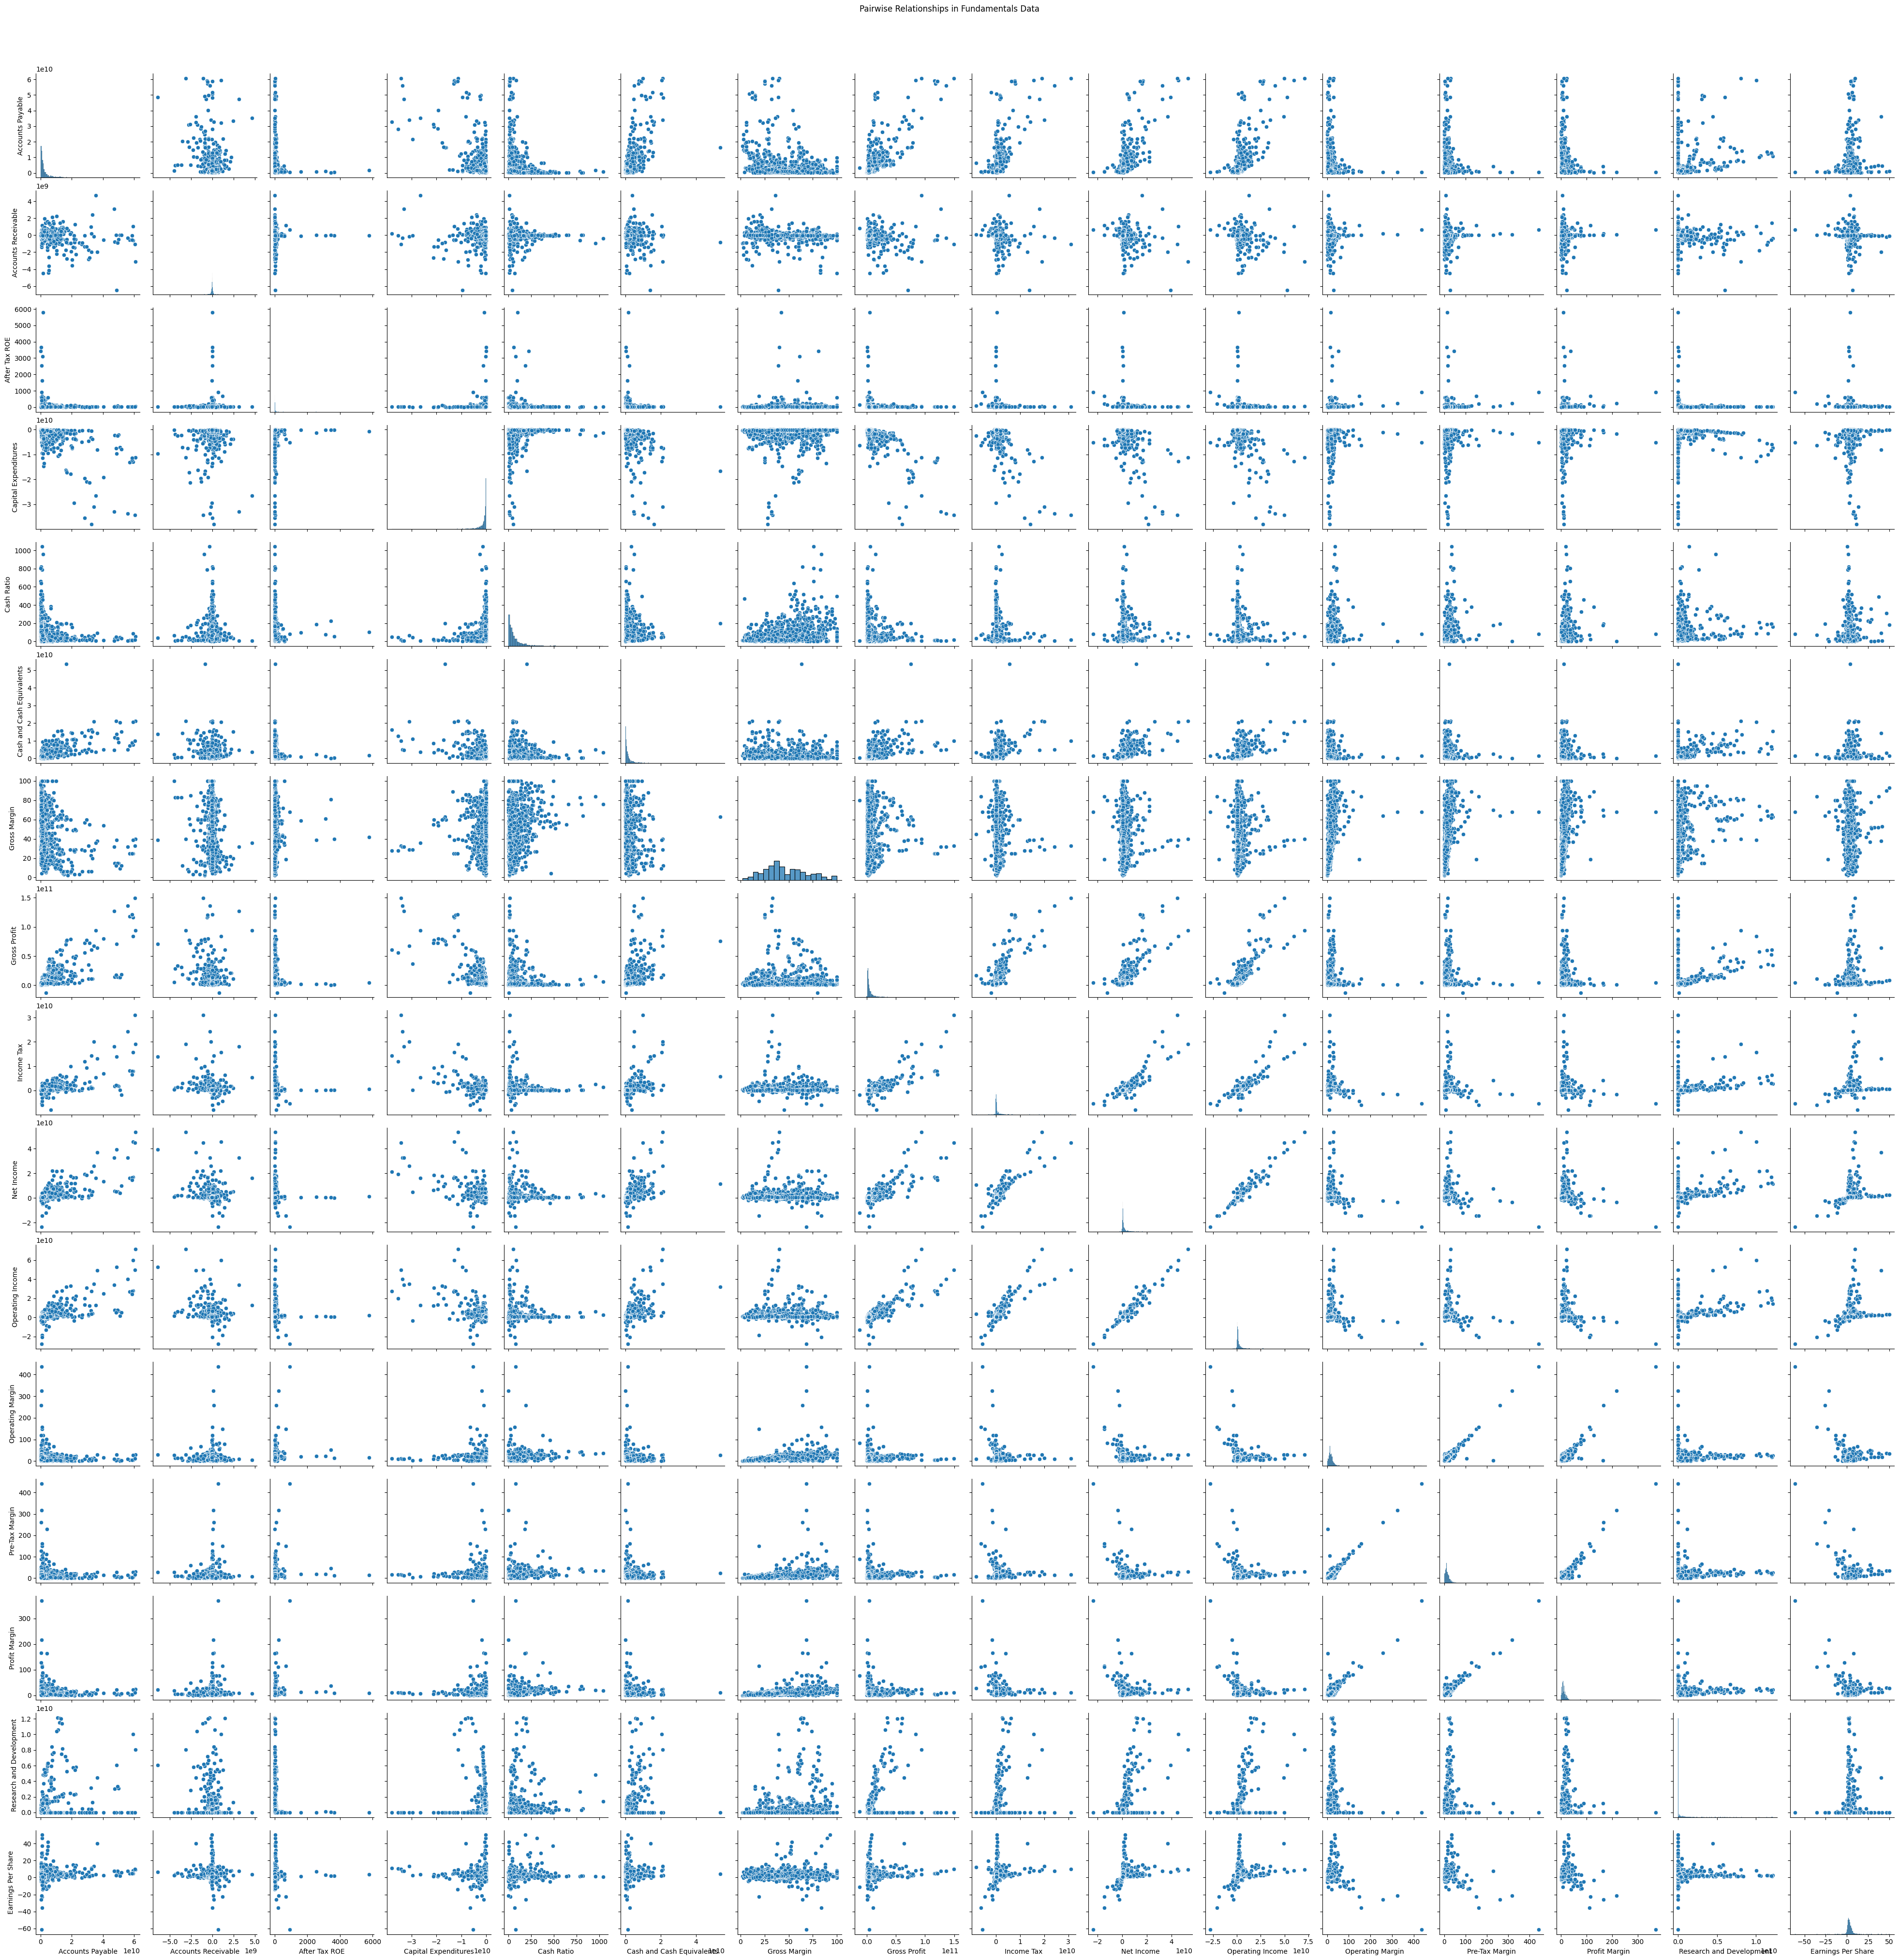

In [125]:
# Select a subset of numerical columns for pair plotting
subset_fundamentals = fundamentals[['Accounts Payable', 'Accounts Receivable', 'After Tax ROE', 
                                    'Capital Expenditures', 'Cash Ratio', 'Cash and Cash Equivalents', 
                                    'Gross Margin', 'Gross Profit', 'Income Tax', 'Net Income',
                                    'Operating Income', 'Operating Margin', 'Pre-Tax Margin', 
                                    'Profit Margin', 'Research and Development', 'Earnings Per Share']]

# Suppress the specific FutureWarning temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Replace inf and -inf values with NaN and drop rows with NaN values
    subset_fundamentals = subset_fundamentals.replace([np.inf, -np.inf], np.nan)
    subset_fundamentals = subset_fundamentals.dropna()

    # Plot pairwise relationships
    sns.pairplot(subset_fundamentals)
    plt.suptitle("Pairwise Relationships in Fundamentals Data", y=1.02)
    plt.show()


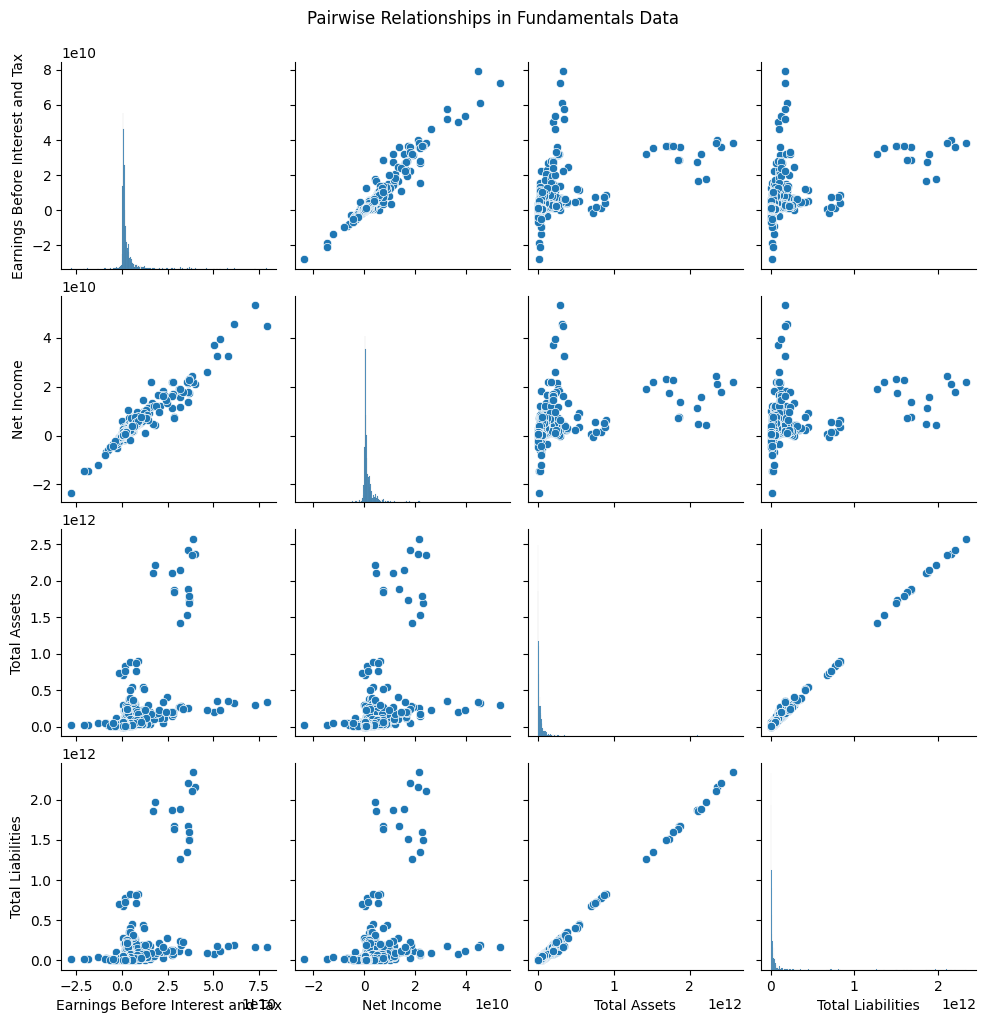

In [126]:
# Suppress the specific FutureWarning temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Replace inf and -inf values with NaN and drop rows with NaN values
    subset = subset.replace([np.inf, -np.inf], np.nan)
    subset = subset.dropna()

    # Plot pairwise relationships
    sns.pairplot(subset)
    plt.suptitle("Pairwise Relationships in Fundamentals Data", y=1.02)
    plt.show()

# **Question 2: Data Preparation**

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [128]:
# Drop any rows with missing values in features or target
data = pd.concat([features, target], axis=1).dropna()

# Split data into features (X) and target (y)
X = data[['open', 'high', 'low', 'volume']].values
y = data['close'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshaped for regression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# **Define the Model**

In [129]:
class DNNRegressor(nn.Module):
    def __init__(self, input_dim):
        super(DNNRegressor, self).__init__()
        self.hidden1 = nn.Linear(input_dim, 64)  # First hidden layer with 64 neurons
        self.hidden2 = nn.Linear(64, 32)         # Second hidden layer with 32 neurons
        self.output = nn.Linear(32, 1)           # Output layer (single neuron for regression)
        self.relu = nn.ReLU()                    # ReLU activation function
        self.dropout = nn.Dropout(0.2)           # Dropout for regularization

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.dropout(x)
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]  # Number of features (4 in this case)
model = DNNRegressor(input_dim)

# **Loss Function and Optimizer**

In [130]:
# Loss function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Optimizer: Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# **Training Loop**

In [131]:
# Training the model
num_epochs = 100  # Set the number of epochs
batch_size = 64  # Set the batch size

# Convert to DataLoader for batching
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Test data for evaluation
test_data = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [132]:

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0

    # Training in batches
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights
        train_loss += loss.item()  # Accumulate the loss

    # Print training loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader):.4f}')


Epoch [10/100], Loss: 27.2645
Epoch [20/100], Loss: 13.2719
Epoch [30/100], Loss: 9.3811
Epoch [40/100], Loss: 8.5084
Epoch [50/100], Loss: 8.0836
Epoch [60/100], Loss: 7.9863
Epoch [70/100], Loss: 7.2325
Epoch [80/100], Loss: 5.5895
Epoch [90/100], Loss: 2.7652
Epoch [100/100], Loss: 2.3521


In [133]:
# After training, evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
test_loss = 0.0
with torch.no_grad():  # No need to track gradients during evaluation
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

print(f'Test Loss: {test_loss/len(test_loader):.4f}')

Test Loss: 325.0338


# **Evaluate the Model**

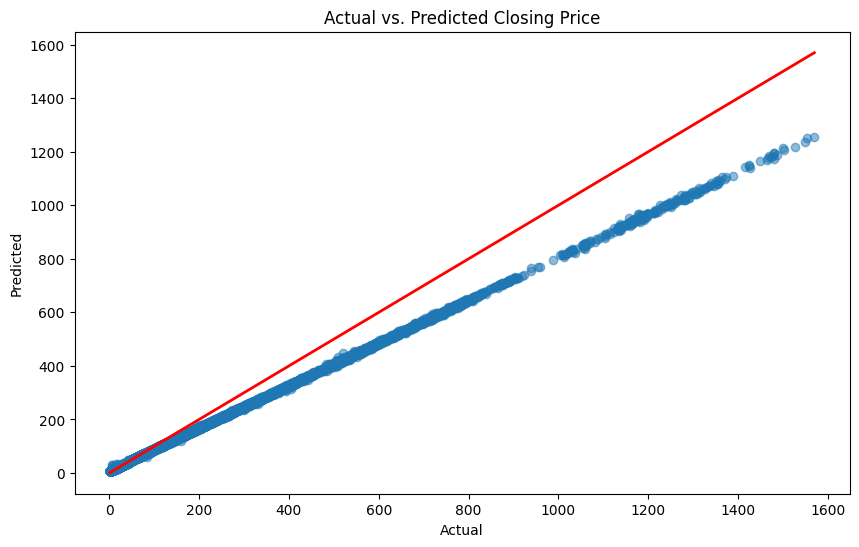

In [134]:
# Make predictions on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)

# Convert predictions to numpy for easier handling
predictions = predictions.numpy()
y_test_numpy = y_test.numpy()

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_numpy, predictions, alpha=0.5)
plt.plot([min(y_test_numpy), max(y_test_numpy)], [min(y_test_numpy), max(y_test_numpy)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Closing Price')
plt.show()

# **Question 3: Define a PyTorch Model Wrapper**

In [135]:
from sklearn.base import BaseEstimator, RegressorMixin
import torch.optim as optim

class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, dropout_rate=0.2, learning_rate=0.001, optimizer_type='Adam', num_epochs=100):
        self.input_dim = input_dim
        self.hidden_dim1 = hidden_dim1
        self.hidden_dim2 = hidden_dim2
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.optimizer_type = optimizer_type
        self.num_epochs = num_epochs
        self.model = None
        self.optimizer = None
        self.criterion = nn.MSELoss()
    
    def _initialize_model(self):
        # Define the model architecture
        model = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim1),
            nn.ReLU(),
            nn.Dropout(self.dropout_rate),
            nn.Linear(self.hidden_dim1, self.hidden_dim2),
            nn.ReLU(),
            nn.Dropout(self.dropout_rate),
            nn.Linear(self.hidden_dim2, 1)
        )
        return model

    def fit(self, X, y):
        self.model = self._initialize_model()

        # Choose optimizer based on the optimizer_type parameter
        if self.optimizer_type == 'Adam':
            self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        elif self.optimizer_type == 'SGD':
            self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

        # Convert to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        # Training loop
        for epoch in range(self.num_epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = self.criterion(outputs, y_tensor)
            loss.backward()
            self.optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            predictions = self.model(X_tensor)
        return predictions.numpy()


# **Define the Parameter Grid**

In [136]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'hidden_dim1': [32, 64, 128],
    'hidden_dim2': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer_type': ['Adam', 'SGD'],
    'num_epochs': [50, 100, 150]
}

# **Instantiate the Model and Run GridSearchCV**

In [138]:
# Set the input dimension based on your feature count (e.g., 4 for 'open', 'high', 'low', 'volume')
input_dim = X_train.shape[1]

# Initialize the PyTorchRegressor
model = PyTorchRegressor(input_dim=input_dim)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Run the grid search on training data
grid_search.fit(X_train.numpy(), y_train.numpy())

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 442, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(

KeyboardInterrupt: 

# **Evaluate the Best Model**

In [139]:
# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate on test data
test_predictions = best_model.predict(X_test.numpy())

# Calculate and print test performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test.numpy(), test_predictions)
mae = mean_absolute_error(y_test.numpy(), test_predictions)

print("Test MSE:", mse)
print("Test MAE:", mae)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

# **Question 4: Modify the Training Loop to Track Loss**

In [140]:
class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, dropout_rate=0.2, learning_rate=0.001, optimizer_type='Adam', num_epochs=100):
        self.input_dim = input_dim
        self.hidden_dim1 = hidden_dim1
        self.hidden_dim2 = hidden_dim2
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.optimizer_type = optimizer_type
        self.num_epochs = num_epochs
        self.model = None
        self.optimizer = None
        self.criterion = nn.MSELoss()
        # Track training and validation loss
        self.train_losses = []
        self.val_losses = []

    def _initialize_model(self):
        model = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim1),
            nn.ReLU(),
            nn.Dropout(self.dropout_rate),
            nn.Linear(self.hidden_dim1, self.hidden_dim2),
            nn.ReLU(),
            nn.Dropout(self.dropout_rate),
            nn.Linear(self.hidden_dim2, 1)
        )
        return model

    def fit(self, X, y, X_val=None, y_val=None):
        self.model = self._initialize_model()
        
        # Optimizer selection
        if self.optimizer_type == 'Adam':
            self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        elif self.optimizer_type == 'SGD':
            self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

        # Convert to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        
        if X_val is not None and y_val is not None:
            X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
            y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

        # Training loop with loss tracking
        for epoch in range(self.num_epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(X_tensor)
            train_loss = self.criterion(outputs, y_tensor)
            train_loss.backward()
            self.optimizer.step()

            # Track training loss
            self.train_losses.append(train_loss.item())

            # Track validation loss if validation data is provided
            if X_val is not None and y_val is not None:
                self.model.eval()
                with torch.no_grad():
                    val_outputs = self.model(X_val_tensor)
                    val_loss = self.criterion(val_outputs, y_val_tensor)
                    self.val_losses.append(val_loss.item())

        return self

# **Update the GridSearch to Use Validation Data**

In [141]:
# Perform grid search with validation data passed explicitly
grid_search.fit(X_train.numpy(), y_train.numpy(), X_val=X_test.numpy(), y_val=y_test.numpy())

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV] END dropout_rate=0.2, hidden_dim1=32, hidden_dim2=16, learning_rate=0.001, num_epochs=50, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.2, hidden_dim1=32, hidden_dim2=16, learning_rate=0.001, num_epochs=50, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.2, hidden_dim1=32, hidden_dim2=16, learning_rate=0.001, num_epochs=50, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.2, hidden_dim1=32, hidden_dim2=16, learning_rate=0.001, num_epochs=100, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.2, hidden_dim1=32, hidden_dim2=16, learning_rate=0.001, num_epochs=100, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.2, hidden_dim1=32, hidden_dim2=16, learning_rate=0.001, num_epochs=100, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.2, hidden_dim1=32, hidden_dim2=16, learning_rate=0.001, num_epochs=100, optimizer_type=SGD; total tim

ValueError: 
All the 1458 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1458 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: PyTorchRegressor.fit() got an unexpected keyword argument 'X_val'


In [143]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class PyTorchRegressorWithValidation(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, dropout_rate=0.2, 
                 weight_decay=0.0, use_batch_norm=False, learning_rate=0.001, 
                 optimizer_type='Adam', num_epochs=100, early_stopping=False, validation_split=0.2):
        self.input_dim = input_dim
        self.hidden_dim1 = hidden_dim1
        self.hidden_dim2 = hidden_dim2
        self.dropout_rate = dropout_rate
        self.weight_decay = weight_decay
        self.use_batch_norm = use_batch_norm
        self.learning_rate = learning_rate
        self.optimizer_type = optimizer_type
        self.num_epochs = num_epochs
        self.early_stopping = early_stopping
        self.validation_split = validation_split
        self.model = None
        self.optimizer = None
        self.criterion = nn.MSELoss()
        self.train_losses = []
        self.val_losses = []

    def _initialize_model(self):
        layers = [
            nn.Linear(self.input_dim, self.hidden_dim1),
            nn.ReLU()
        ]
        if self.use_batch_norm:
            layers.append(nn.BatchNorm1d(self.hidden_dim1))
        layers.append(nn.Dropout(self.dropout_rate))
        
        layers += [
            nn.Linear(self.hidden_dim1, self.hidden_dim2),
            nn.ReLU()
        ]
        if self.use_batch_norm:
            layers.append(nn.BatchNorm1d(self.hidden_dim2))
        layers.append(nn.Dropout(self.dropout_rate))
        
        layers.append(nn.Linear(self.hidden_dim2, 1))
        
        model = nn.Sequential(*layers)
        return model

    def fit(self, X, y):
        self.model = self._initialize_model()
        
        # Optimizer with weight decay for L2 regularization
        if self.optimizer_type == 'Adam':
            self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)
        elif self.optimizer_type == 'SGD':
            self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)

        # Convert to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        
        # Create a validation split
        train_X, val_X, train_y, val_y = train_test_split(X_tensor, y_tensor, test_size=self.validation_split)

        # Training loop with validation
        for epoch in range(self.num_epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(train_X)
            train_loss = self.criterion(outputs, train_y)
            train_loss.backward()
            self.optimizer.step()
            self.train_losses.append(train_loss.item())

            # Validation loss
            self.model.eval()
            with torch.no_grad():
                val_outputs = self.model(val_X)
                val_loss = self.criterion(val_outputs, val_y)
                self.val_losses.append(val_loss.item())
            
            # Early stopping
            if self.early_stopping and epoch > 10 and val_loss.item() > min(self.val_losses[-10:]):
                print(f"Early stopping at epoch {epoch}")
                break

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            predictions = self.model(X_tensor)
        return predictions.numpy()

    def score(self, X, y):
        predictions = self.predict(X)
        return mean_squared_error(y, predictions)

In [144]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'hidden_dim1': [32, 64],
    'hidden_dim2': [32, 64],
    'dropout_rate': [0.2, 0.4],
    'learning_rate': [0.001, 0.01],
    'optimizer_type': ['Adam', 'SGD'],
    'num_epochs': [10, 20],
    'early_stopping': [True, False]
}

# Define the model
input_dim = X_train.shape[1]  # Number of input features
model = PyTorchRegressorWithValidation(input_dim=input_dim)

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/opt/conda/lib/python3.10/site-p

[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=50, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=50, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=100, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=100, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, learning_rate=0.001, num_epochs=50, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, learning_rate=0.001, num_epochs=50, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, learning_rate=0.001, num_epochs=50, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, learni

/tmp/ipykernel_31/236032777.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/tmp/ipykernel_31/236032777.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/tmp/ipykernel_31/236032777.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickli

[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=150, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=150, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=150, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=32, learning_rate=0.1, num_epochs=150, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, learning_rate=0.001, num_epochs=100, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, learning_rate=0.001, num_epochs=100, optimizer_type=SGD; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, learning_rate=0.001, num_epochs=150, optimizer_type=Adam; total time=   0.0s
[CV] END dropout_rate=0.4, hidden_dim1=64, hidden_dim2=64, 

/tmp/ipykernel_31/236032777.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/tmp/ipykernel_31/236032777.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/tmp/ipykernel_31/236032777.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickli

KeyboardInterrupt: 

# **Plot the Loss Curves**

In [145]:
import matplotlib.pyplot as plt

# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(best_model.train_losses, label='Training Loss')
plt.plot(best_model.val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

# **Question 5: Update the Model with Regularization Options**

In [147]:
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, RegressorMixin

class PyTorchRegressorWithRegularization(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, dropout_rate=0.2, 
                 weight_decay=0.0, use_batch_norm=False, learning_rate=0.001, 
                 optimizer_type='Adam', num_epochs=100, early_stopping=False):
        self.input_dim = input_dim
        self.hidden_dim1 = hidden_dim1
        self.hidden_dim2 = hidden_dim2
        self.dropout_rate = dropout_rate
        self.weight_decay = weight_decay
        self.use_batch_norm = use_batch_norm
        self.learning_rate = learning_rate
        self.optimizer_type = optimizer_type
        self.num_epochs = num_epochs
        self.early_stopping = early_stopping
        self.model = None
        self.optimizer = None
        self.criterion = nn.MSELoss()
        self.train_losses = []
        self.val_losses = []

    def _initialize_model(self):
        layers = [
            nn.Linear(self.input_dim, self.hidden_dim1),
            nn.ReLU()
        ]
        if self.use_batch_norm:
            layers.append(nn.BatchNorm1d(self.hidden_dim1))
        layers.append(nn.Dropout(self.dropout_rate))
        
        layers += [
            nn.Linear(self.hidden_dim1, self.hidden_dim2),
            nn.ReLU()
        ]
        if self.use_batch_norm:
            layers.append(nn.BatchNorm1d(self.hidden_dim2))
        layers.append(nn.Dropout(self.dropout_rate))
        
        layers.append(nn.Linear(self.hidden_dim2, 1))
        
        model = nn.Sequential(*layers)
        return model

    def fit(self, X, y, X_val=None, y_val=None):
        self.model = self._initialize_model()
        
        # Optimizer with weight decay for L2 regularization
        if self.optimizer_type == 'Adam':
            self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)
        elif self.optimizer_type == 'SGD':
            self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)

        # Convert to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        
        if X_val is not None and y_val is not None:
            X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
            y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

        # Training loop with early stopping
        for epoch in range(self.num_epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(X_tensor)
            train_loss = self.criterion(outputs, y_tensor)
            train_loss.backward()
            self.optimizer.step()
            self.train_losses.append(train_loss.item())

            # Validation loss and early stopping check
            if X_val is not None and y_val is not None:
                self.model.eval()
                with torch.no_grad():
                    val_outputs = self.model(X_val_tensor)
                    val_loss = self.criterion(val_outputs, y_val_tensor)
                    self.val_losses.append(val_loss.item())
                if self.early_stopping and epoch > 10:
                    if val_loss.item() > min(self.val_losses[-10:]):  # Check for validation loss increase
                        print(f"Early stopping at epoch {epoch}")
                        break

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            predictions = self.model(X_tensor)
        return predictions.numpy()

# **Define Hyperparameter Grids for Grid Search**

In [148]:
param_grid = {
    'hidden_dim1': [64, 128],
    'hidden_dim2': [32, 64],
    'dropout_rate': [0.2, 0.4],
    'weight_decay': [0.0, 0.01, 0.001],  # Regularization strength
    'use_batch_norm': [True, False],
    'learning_rate': [0.001, 0.01],
    'optimizer_type': ['Adam', 'SGD'],
    'num_epochs': [100],
    'early_stopping': [True]
}

# **Run Grid Search with Cross-Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV

input_dim = X_train.shape[1]
model = PyTorchRegressorWithRegularization(input_dim=input_dim)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Run the grid search on training data
grid_search.fit(X_train.numpy(), y_train.numpy(), X_val=X_test.numpy(), y_val=y_test.numpy())

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


# **Compare Performance with the Baseline Model**